In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
ab = pd.read_csv('mymoviedb.csv', lineterminator='\n')

In [13]:
ab.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [14]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [15]:
ab['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [16]:
ab.duplicated().sum()

0

In [17]:
ab.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [18]:
ab['Release_Date'] = pd.to_datetime(ab['Release_Date'])

print(ab['Release_Date'].dtypes)

datetime64[ns]


In [19]:
ab['Release_Date'] = ab['Release_Date'].dt.year

ab['Release_Date'].dtypes

dtype('int32')

In [20]:
ab.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping the columns

In [21]:
cols = ['Overview','Original_Language','Poster_Url']

In [22]:
ab.drop(cols, axis=1, inplace=True)
ab.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

Vote_Average -> divide into categories (popular, average, below_avg, not_popular)

In [23]:
def categorize_vote_average(row):
    if row['Vote_Average'] >= 8.0:
        return 'popular'
    elif row['Vote_Average'] >= 6.0:
        return 'average'
    elif row['Vote_Average'] >= 4.0:
        return 'below_avg'
    else:
        return 'non_popular'

# Apply the function to the 'Vote_Average' column in the DataFrame
ab['Vote_Average_Category'] = ab.apply(categorize_vote_average, axis=1)

# Display the updated DataFrame
print(ab)


      Release_Date                                 Title  Popularity  \
0             2021               Spider-Man: No Way Home    5083.954   
1             2022                            The Batman    3827.658   
2             2022                               No Exit    2618.087   
3             2021                               Encanto    2402.201   
4             2021                        The King's Man    1895.511   
...            ...                                   ...         ...   
9822          1973                              Badlands      13.357   
9823          2020                      Violent Delights      13.356   
9824          2016                          The Offering      13.355   
9825          2021  The United States vs. Billie Holiday      13.354   
9826          1984                               Threads      13.354   

      Vote_Count  Vote_Average                               Genre  \
0           8940           8.3  Action, Adventure, Science Fictio

In [24]:
ab.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",popular
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",popular
2,2022,No Exit,2618.087,122,6.3,Thriller,average
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",average
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",average


In [25]:
# Check if describe works and gives valid statistics
desc = ab['Vote_Average'].describe()
print(desc)  # Print the summary to verify min, 25%, 50%, 75%, max


count    9827.000000
mean        6.439534
std         1.129759
min         0.000000
25%         5.900000
50%         6.500000
75%         7.100000
max        10.000000
Name: Vote_Average, dtype: float64


In [26]:
ab['Vote_Average_Category'].value_counts()

Vote_Average_Category
average        6824
below_avg      2388
popular         436
non_popular     179
Name: count, dtype: int64

In [27]:
cols=['Vote_Average']
ab.drop(cols, axis=1, inplace=True)
ab.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Genre',
       'Vote_Average_Category'],
      dtype='object')

In [28]:
ab.dropna(inplace=True)

ab.isna().sum()

Release_Date             0
Title                    0
Popularity               0
Vote_Count               0
Genre                    0
Vote_Average_Category    0
dtype: int64

In [29]:
ab.head()

,Release_Date,Title,Popularity,Vote_Count,Genre,Vote_Average_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,"Action, Adventure, Science Fiction",popular
1,2022,The Batman,3827.658,1151,"Crime, Mystery, Thriller",popular
2,2022,No Exit,2618.087,122,Thriller,average
3,2021,Encanto,2402.201,5076,"Animation, Comedy, Family, Fantasy",average
4,2021,The King's Man,1895.511,1793,"Action, Adventure, Thriller, War",average


In [30]:
ab['Genre'] = ab['Genre'].fillna('')  # Replace NaN with empty string to avoid issues

# Now, split the 'Genre' column by comma and space
ab['Genre'] = ab['Genre'].str.split(', ')

# Explode the list of genres into separate rows
ab = ab.explode('Genre').reset_index(drop=True)

# Display the first few rows to check
ab.head()


,Release_Date,Title,Popularity,Vote_Count,Genre,Vote_Average_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,Action,popular
1,2021,Spider-Man: No Way Home,5083.954,8940,Adventure,popular
2,2021,Spider-Man: No Way Home,5083.954,8940,Science Fiction,popular
3,2022,The Batman,3827.658,1151,Crime,popular
4,2022,The Batman,3827.658,1151,Mystery,popular


In [31]:
ab['Genre'] = ab['Genre'].astype('category')

ab['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [32]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Release_Date           25793 non-null  int32   
 1   Title                  25793 non-null  object  
 2   Popularity             25793 non-null  float64 
 3   Vote_Count             25793 non-null  int64   
 4   Genre                  25793 non-null  category
 5   Vote_Average_Category  25793 non-null  object  
dtypes: category(1), float64(1), int32(1), int64(1), object(2)
memory usage: 932.8+ KB


In [33]:
ab.nunique()

Release_Date              102
Title                    9513
Popularity               8160
Vote_Count               3266
Genre                      19
Vote_Average_Category       4
dtype: int64

Data Visualization

In [34]:
sns.set_style('whitegrid')

What is the most frequent genre of movies released on Netflix?

In [35]:
ab['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

In [ ]:
Which has highest votes in vote avg column? (Vote_Average_Category)

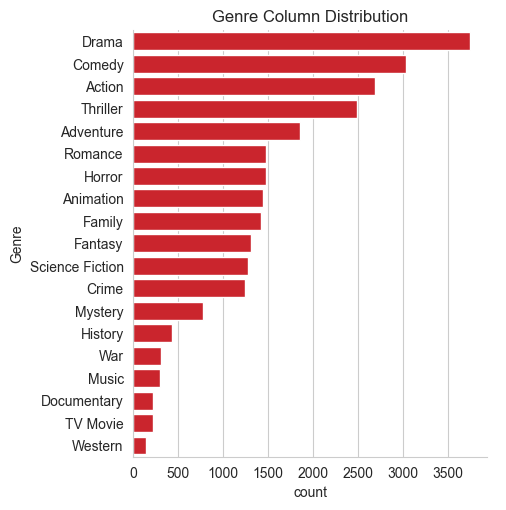

In [36]:
sns.catplot(y = 'Genre', data=ab, kind='count', order=ab['Genre'].value_counts().index, color = '#E50914')
plt.title('Genre Column Distribution')
plt.show()

In [37]:
ab.head()

,Release_Date,Title,Popularity,Vote_Count,Genre,Vote_Average_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,Action,popular
1,2021,Spider-Man: No Way Home,5083.954,8940,Adventure,popular
2,2021,Spider-Man: No Way Home,5083.954,8940,Science Fiction,popular
3,2022,The Batman,3827.658,1151,Crime,popular
4,2022,The Batman,3827.658,1151,Mystery,popular


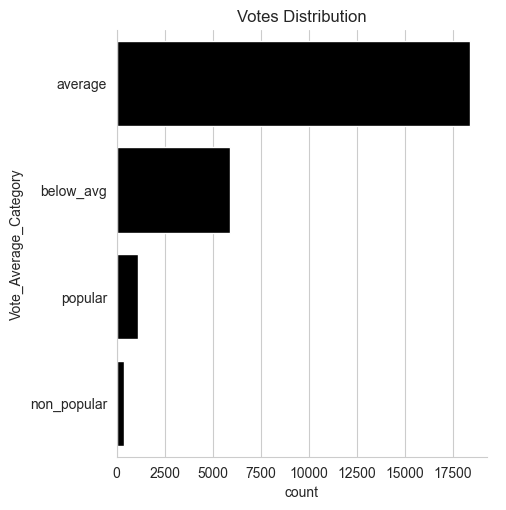

In [44]:
sns.catplot(y='Vote_Average_Category', data=ab, kind='count', order=ab['Vote_Average_Category'].value_counts().index, color='#000000')
plt.title('Votes Distribution')
plt.show()

What movie got highest popularity and what is its genre?

In [45]:
ab[ab['Popularity'] == ab['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Genre,Vote_Average_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,Action,popular
1,2021,Spider-Man: No Way Home,5083.954,8940,Adventure,popular
2,2021,Spider-Man: No Way Home,5083.954,8940,Science Fiction,popular


what movie got lowest popularity? what's its genre?

In [46]:
ab[ab['Popularity'] == ab['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Genre,Vote_Average_Category
25787,2021,The United States vs. Billie Holiday,13.354,152,Music,average
25788,2021,The United States vs. Billie Holiday,13.354,152,Drama,average
25789,2021,The United States vs. Billie Holiday,13.354,152,History,average
25790,1984,Threads,13.354,186,War,average
25791,1984,Threads,13.354,186,Drama,average
25792,1984,Threads,13.354,186,Science Fiction,average


which year has the most filmmed movies?

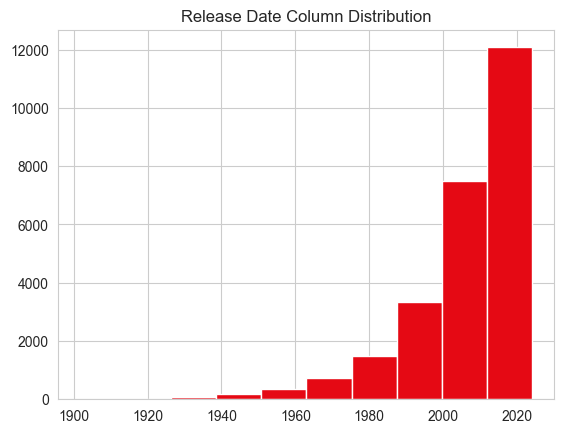

In [49]:
ab['Release_Date'].hist(color='#E50914')
plt.title('Release Date Column Distribution')
plt.show()

Conclusion
Q1. What is the most frequent genre in the dataset?
Ans: Drama genre is the most frequent genre in our dataset and has appeared at the top among 19 other genres.

Q2. What genres has highest votes?
Ans: Drama gets the highest popularity among fans.

Q3. What movie got the highest popularity? what's its genre?
Ans: Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genre Action, Adventure and Science Fiction. 

Q4. what movie got lowest popularity? what's its genre?
Ans: The United States vs. Billie Holiday and Threads	 has the lowest rate in our dataset and it has genres of music, drama, war, sci-fi and history. 

Q5. Which year has the most filmmed movies?
Ans: Year 2020 has the highest filmming rate in our dataset.